## K Means Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
# Make Dataset
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

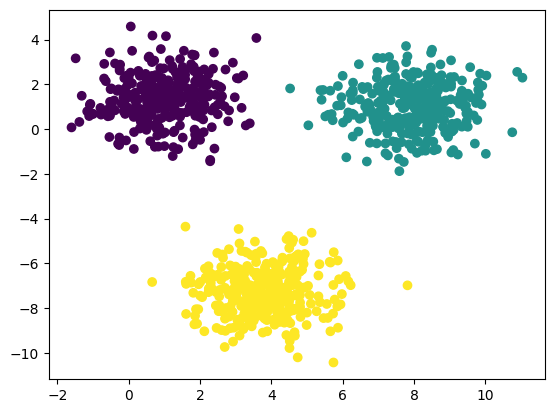

In [3]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [4]:
# Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.30)

In [5]:
# Elbow Method to determine the Number of clusters
from sklearn.cluster import KMeans

wcss = []

for n in range(1,11):
    kmeans = KMeans(n_clusters=n, init='k-means++', verbose=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/si

In [6]:
wcss

[18404.830935915197,
 7221.867816343637,
 1492.4251980980475,
 1314.0514199763666,
 1142.4718222082508,
 972.1941591690703,
 857.5654219687377,
 765.9802551568474,
 674.6888111810871,
 624.1896549209778]

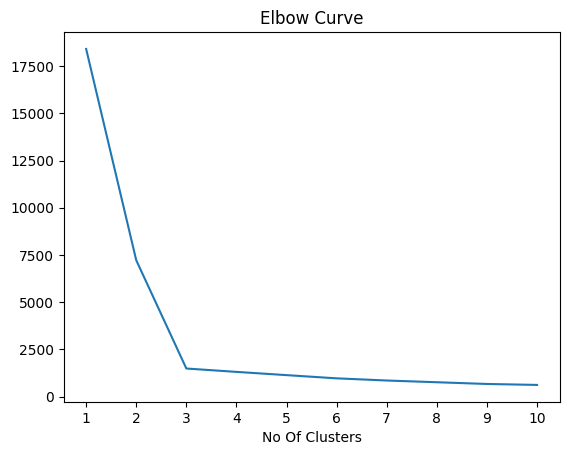

In [7]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("No Of Clusters")
# plt.ylabel("WCSS")
plt.title("Elbow Curve")
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_labels = kmeans.fit_predict(X_train)

/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
kmeans.labels_

array([0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0,
       0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0,
       1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,

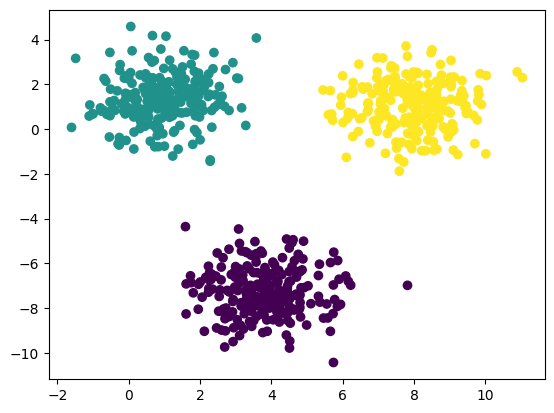

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)
plt.show()

In [11]:
# To Automate the process of finding Elbow Point , we use Knee Locator
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
k1.elbow

3

In [13]:
# Silhoutte Score
from sklearn.metrics import silhouette_score

In [14]:
silhouette_coefficients = []
for k in range(2,11):
    kmenas = KMeans(n_clusters=k, init='k-means++')
    kmenas.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/utpal/.local/lib/python3.10/si

In [15]:
silhouette_coefficients

[0.7559138839501955,
 0.7559138839501955,
 0.7559138839501955,
 0.7559138839501955,
 0.7559138839501955,
 0.7559138839501955,
 0.7559138839501955,
 0.7559138839501955,
 0.7559138839501955]

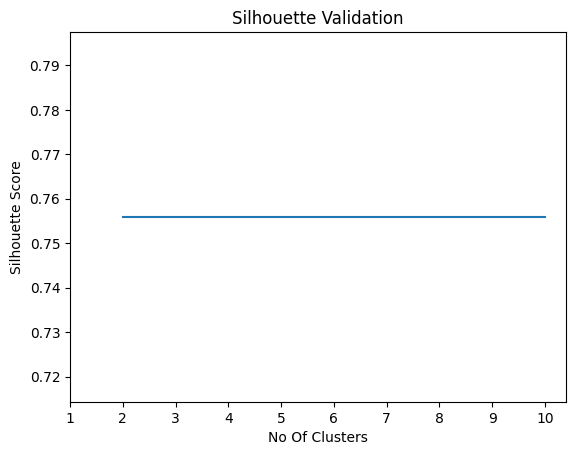

In [18]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(1,11))
plt.xlabel("No Of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Validation")
plt.show()